In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Salary_Data.csv')
data.sample(4)

,YearsExperience,Salary
25,9.0,105582.0
27,9.6,112635.0
12,4.0,56957.0
22,7.9,101302.0


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## finding correlation

In [5]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## checking duplicates if any

In [6]:
data.duplicated().any()

False

## checking null values 

In [7]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## plotting box plot for detecting outliers if any

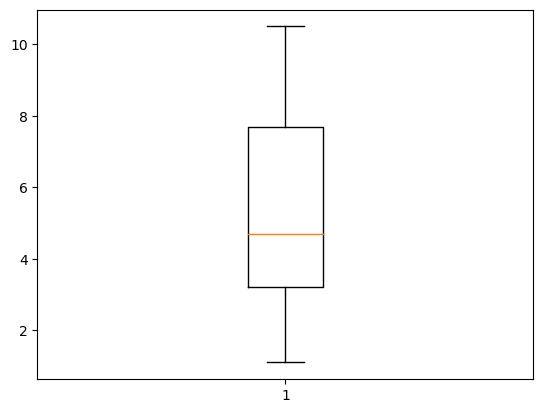

In [8]:
plt.boxplot(data['YearsExperience'])
plt.show()

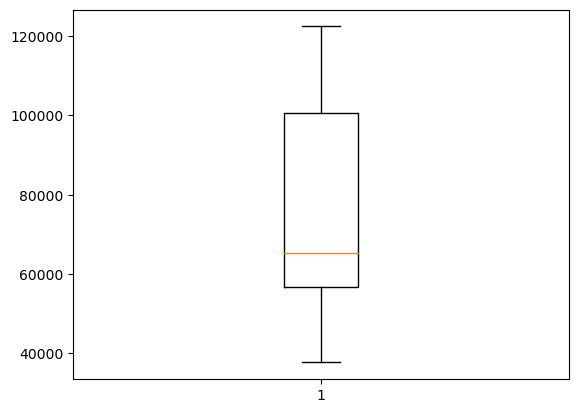

In [9]:
plt.boxplot(data['Salary'])
plt.show()

## Transformations on YearsExperience

In [10]:
import scipy.stats as stats
import pylab

In [11]:
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)

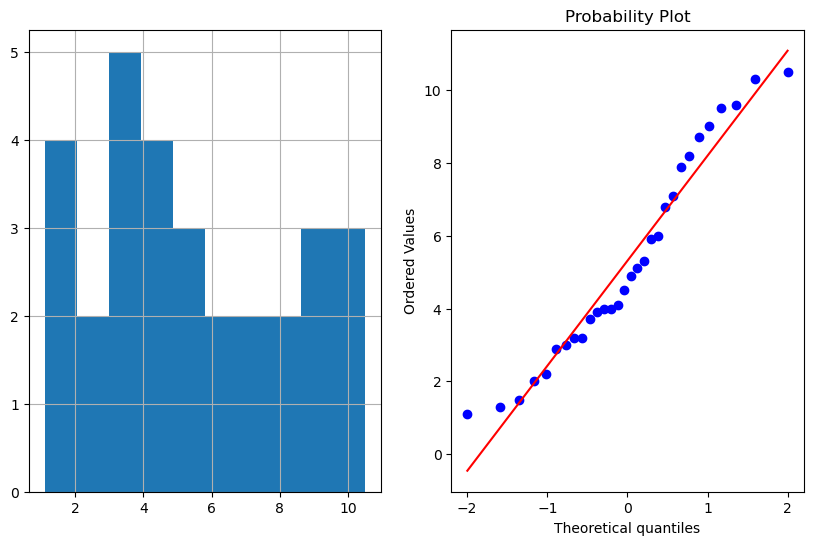

In [12]:
## normal
plot_data(data,'YearsExperience')

## Logarithmic transformation

In [13]:
import numpy as np

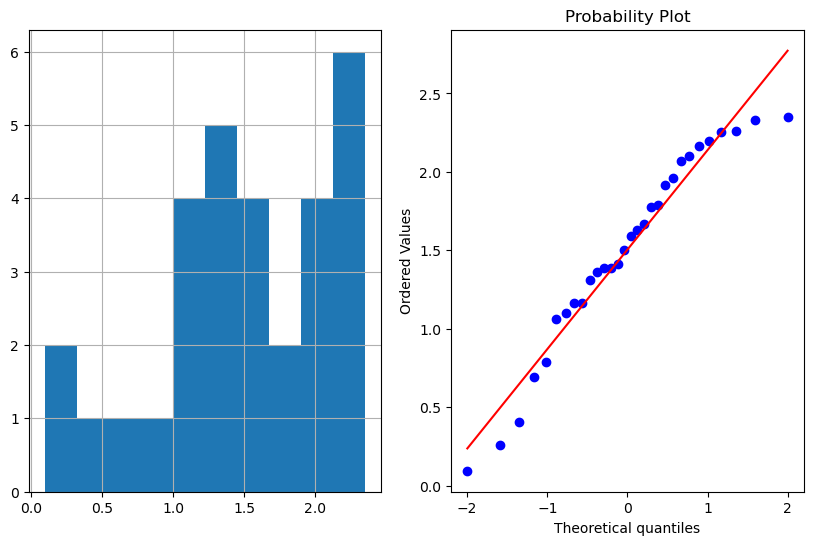

In [14]:
data['YearsExperience_log']=np.log(data['YearsExperience'])
plot_data(data,'YearsExperience_log')

## Exponential transformation

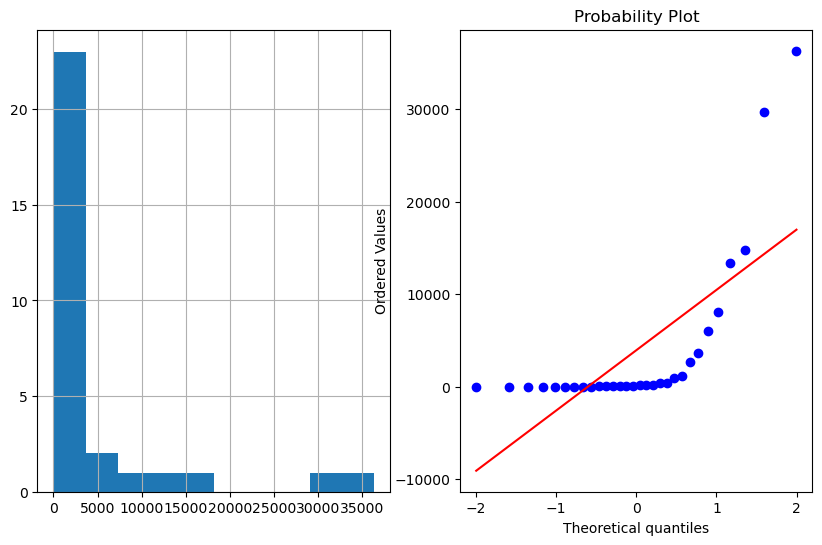

In [15]:
data['YearsExperience_exp']=np.exp(data['YearsExperience'])
plot_data(data,'YearsExperience_exp')

## Reciprocal Transformation

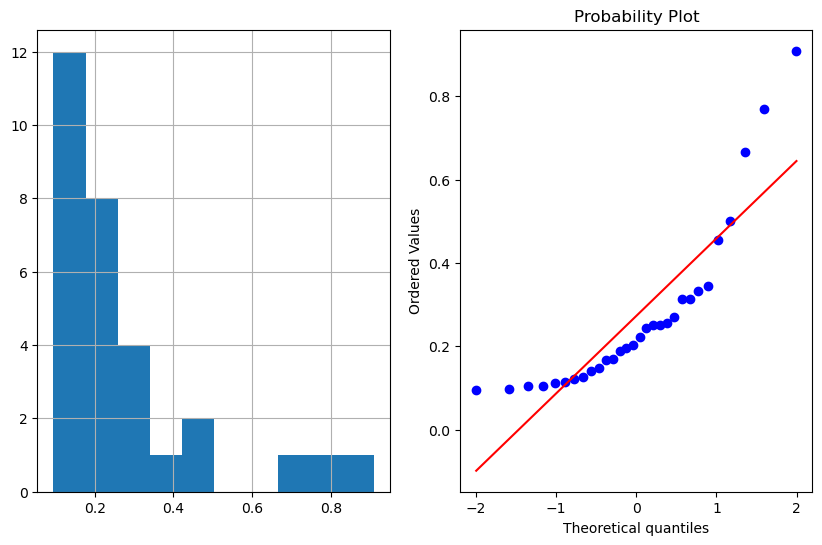

In [16]:
data['YearsExperience_rec']=1/data['YearsExperience']
plot_data(data,'YearsExperience_rec')

## sqrt transformation

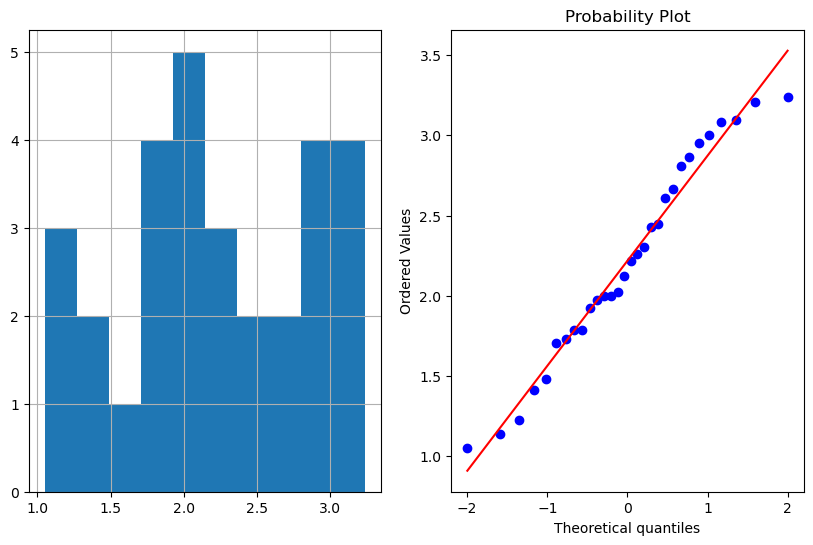

In [17]:
data['YearsExperience_sqrt']=np.sqrt(data['YearsExperience'])
plot_data(data,'YearsExperience_sqrt')

##  boxcox transformation

In [18]:
data['YearsExperience_boxcox'],parameters=stats.boxcox(data['YearsExperience'])
parameters

0.455212442963424

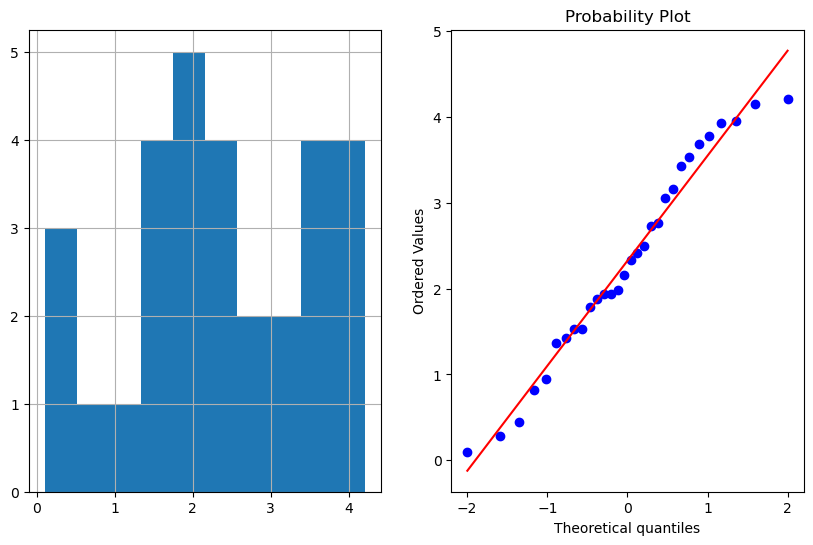

In [19]:
plot_data(data,'YearsExperience_boxcox')

#### Observations
Normal or orginal feature(YearsExperience) gives more accuracy than all other transformations

## seperating into feature(X) and target(y)

In [20]:
X=data[['YearsExperience']]

In [21]:
y=data['Salary']

In [22]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [23]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

## doing Train test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,random_state=100)

## Building Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lin_model=LinearRegression()

In [28]:
lin_model.fit(X_train,y_train)

LinearRegression()

## checking Accuracy of model

In [30]:
lin_model.score(X_test,y_test)

0.9720725422361338